# **Importing Necessary Libraries**

In [20]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re

In [4]:
base_path_sensor_data =kagglehub.dataset_download("austcse/embedded-smartphone-sensor-data")
# Define file paths
sensordata_path = os.path.join(base_path_sensor_data, 'SENSORDATA.csv')
sensors_list_path = os.path.join(base_path_sensor_data, 'Sensors.csv')
userinfo_path = os.path.join(base_path_sensor_data, 'UserInfo.csv')

100%|██████████| 1.56M/1.56M [00:04<00:00, 372kB/s]

Extracting files...


In [11]:
df_sensored_data=pd.read_csv(sensordata_path, low_memory=False)
df_sensors_list = pd.read_csv(sensors_list_path)
df_userinfo = pd.read_csv(userinfo_path)


In [12]:
display("--- 2. Sensors.csv ---")
display("\n[INFO]")
df_sensors_list.info()
display("\n[SHAPE]")
display(df_sensors_list.shape)
display("\n[CONTENT]")
display(df_sensors_list)
display("\n" + "="*50 + "\n")

'--- 2. Sensors.csv ---'

'\n[INFO]'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21690 entries, 0 to 21689
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           21690 non-null  int64  
 1   ACCELEROMETER_X      21690 non-null  float64
 2   ACCELEROMETER_Y      21690 non-null  float64
 3   ACCELEROMETER_Z      21690 non-null  float64
 4   BATTERY_LEVEL        21653 non-null  object 
 5   Date_time            21690 non-null  object 
 6   GRAV_X               21675 non-null  float64
 7   GRAV_Y               21675 non-null  float64
 8   GRAV_Z               21675 non-null  float64
 9   GYROSCOPE_X          21690 non-null  float64
 10  GYROSCOPE_Y          21690 non-null  float64
 11  GYROSCOPE_Z          21690 non-null  float64
 12  Light_v              21690 non-null  float64
 13  MAG_X                21690 non-null  float64
 14  MAG_Y                21690 non-null  float64
 15  MAG_Z                21690 non-null 

'\n[SHAPE]'

(21690, 22)

'\n[CONTENT]'

,Unnamed: 0,ACCELEROMETER_X,ACCELEROMETER_Y,ACCELEROMETER_Z,BATTERY_LEVEL,Date_time,GRAV_X,GRAV_Y,GRAV_Z,GYROSCOPE_X,...,Light_v,MAG_X,MAG_Y,MAG_Z,ORIENTATION_AZIMUTH,ORIENTATION_PITCH,ORIENTATION_ROLL,SENSORGPS_LATITUDE,SENSORGPS_LONGITUDE,UID
0,0,1.638780,9.597090,1.22815,49%,3/6/2022 23:53,2.698660,9.301170,1.54139,-0.003876,...,0.0,-25.3601,-28.85280,13.19270,1.338770,-1.360560,-0.927660,23.7965,90.3626,21rBNMK6hfNA2oMpLW6RyBpqvKr1
1,1,0.511902,1.896530,9.51927,59%,3/8/2022 19:07,0.000000,0.000000,0.00000,-0.002197,...,0.0,15.3198,-37.04990,15.51210,-2.790730,-0.196379,-0.053724,23.7965,90.3625,21rBNMK6hfNA2oMpLW6RyBpqvKr1
2,2,0.511902,1.896530,9.51927,55%,3/8/2022 19:22,0.000000,0.000000,0.00000,-0.002197,...,0.0,15.3198,-37.04990,15.51210,-2.790730,-0.196379,-0.053724,23.7965,90.3625,21rBNMK6hfNA2oMpLW6RyBpqvKr1
3,3,2.064150,9.109470,-2.56427,61%,3/9/2022 18:20,2.041740,9.407570,-1.87062,-0.077591,...,1.0,-34.9594,-18.32430,18.24190,-0.517382,-1.224030,-2.463830,23.7966,90.3626,21rBNMK6hfNA2oMpLW6RyBpqvKr1
4,4,2.064150,9.109470,-2.56427,59%,3/9/2022 18:57,2.041740,9.407570,-1.87062,-0.077591,...,1.0,-34.9594,-18.32430,18.24190,-0.517382,-1.224030,-2.463830,23.7965,90.3622,21rBNMK6hfNA2oMpLW6RyBpqvKr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21685,21685,0.142672,0.432503,9.70648,79%,3/12/2022 20:46,0.138783,0.436370,9.79595,0.000153,...,128.0,35.8125,-18.13130,-17.92500,-2.018870,0.000000,0.000000,23.7325,90.4077,yl6YL35fFiRSS4zilAlcr1WjZj82
21686,21686,0.052343,0.479462,9.76092,87%,3/12/2022 21:01,0.059510,0.598445,9.78819,0.020311,...,172.0,42.9375,-12.75000,-5.41875,-1.853480,0.000000,0.000000,23.7325,90.4077,yl6YL35fFiRSS4zilAlcr1WjZj82
21687,21687,-0.610469,5.469690,8.02403,96%,3/12/2022 21:16,-0.571997,5.671040,7.98013,0.025198,...,265.0,36.8625,8.64375,-15.48750,-1.115930,-0.596971,0.075934,23.7325,90.4077,yl6YL35fFiRSS4zilAlcr1WjZj82
21688,21688,-0.810868,4.016950,8.80708,100%,3/12/2022 21:31,-0.843334,4.059580,8.88701,-0.032528,...,262.0,19.9688,-10.96880,19.38750,-2.242250,-0.426328,0.091811,23.7325,90.4077,yl6YL35fFiRSS4zilAlcr1WjZj82


'\n==================================================\n'

In [8]:
display("--- 3. UserInfo.csv ---")
display("\n[INFO]")
df_userinfo.info()
display("\n[SHAPE]")
display(df_userinfo.shape)
display("\n[FIRST 5 ROWS]")
display(df_userinfo.head())
display("\n" + "="*50 + "\n")

'--- 3. UserInfo.csv ---'

'\n[INFO]'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  145 non-null    int64 
 1   age         145 non-null    object
 2   gender      145 non-null    object
 3   uni         145 non-null    object
 4   UID         145 non-null    object
dtypes: int64(1), object(4)
memory usage: 5.8+ KB


'\n[SHAPE]'

(145, 5)

'\n[FIRST 5 ROWS]'

,Unnamed: 0,age,gender,uni,UID
0,0,21-25,Male,AUST,0CAgvoqTKaXMSZjcd6rJvWMJ1bs2
1,1,21-25,Female,Others,21rBNMK6hfNA2oMpLW6RyBpqvKr1
2,2,21-25,Male,AUST,2IxdLrnXiYRhBeZNDuTc42558YG2
3,3,21-25,Female,Others,34aHCNx4fvb5pyE4mPdbGTMXjPb2
4,4,21-25,Female,AUST,38IyoUCxjrgfy2x7iBtLxh5JzJD3


'\n==================================================\n'

In [9]:
# --- Reuse file paths from Cell 2 ---
# Ensure these paths are correct from your initial download.
base_path_sensor_data = kagglehub.dataset_download("austcse/embedded-smartphone-sensor-data") #<-- IMPORTANT: UPDATE THIS PATH

sensordata_path = os.path.join(base_path_sensor_data, 'SENSORDATA.csv')
sensors_list_path = os.path.join(base_path_sensor_data, 'Sensors.csv')
userinfo_path = os.path.join(base_path_sensor_data, 'UserInfo.csv')


In [14]:
import pandas as pd
import os

# --- Reuse file paths from Cell 2 ---
# Ensure these paths are correct from your initial download.
base_path_sensor_data = kagglehub.dataset_download("austcse/embedded-smartphone-sensor-data") #<-- IMPORTANT: UPDATE THIS PATH

sensordata_path = os.path.join(base_path_sensor_data, 'SENSORDATA.csv')
sensors_list_path = os.path.join(base_path_sensor_data, 'Sensors.csv')
userinfo_path = os.path.join(base_path_sensor_data, 'UserInfo.csv')

# --- Load Data (assuming DataFrames are not in memory from Cell 2) ---
try:
    df_sensordata = pd.read_csv(sensordata_path)
    df_sensors_list = pd.read_csv(sensors_list_path)
    df_userinfo = pd.read_csv(userinfo_path)
except FileNotFoundError:
    display(f"Error: Files not found. Please ensure the base_path '{base_path_sensor_data}' is correct.")
    # Stop execution if files aren't found
    df_sensordata, df_sensors_list, df_userinfo = None, None, None

# --- Main Data Processing block ---
if df_sensordata is not None:
    # 1. Combine Sensor DataFrames
    display("Combining SENSORDATA.csv and Sensors.csv...")
    df_master_sensors = pd.concat([df_sensordata, df_sensors_list], ignore_index=True)
    display(f"Initial combined shape: {df_master_sensors.shape}")

    # 2. Clean Data Types and Columns
    display("\nCleaning data...")
    # Drop redundant index column
    df_master_sensors.drop(columns=['Unnamed: 0'], inplace=True)
    df_userinfo.drop(columns=['Unnamed: 0'], inplace=True)

    # Clean BATTERY_LEVEL: remove '%' and convert to numeric
    df_master_sensors['BATTERY_LEVEL'] = df_master_sensors['BATTERY_LEVEL'].str.replace('%', '').astype(float)

    # Convert Date_time to datetime objects using 'mixed' format to handle inconsistencies
    display("Converting 'Date_time' column with mixed formats...")
    df_master_sensors['Date_time'] = pd.to_datetime(df_master_sensors['Date_time'], format='mixed')
    display("'Date_time' column successfully converted.")

    # Drop GPS columns
    df_master_sensors.drop(columns=['SENSORGPS_LATITUDE', 'SENSORGPS_LONGITUDE'], inplace=True)

    # 3. Handle Missing Values
    display("\nHandling missing values...")
    # Forward fill is a good strategy for sensor data as a value is likely to be same as the previous reading
    df_master_sensors.ffill(inplace=True)
    display("Missing values handled.")

    # 4. Merge with UserInfo
    display("\nMerging sensor data with user info...")
    df_final = pd.merge(df_master_sensors, df_userinfo, on='UID', how='left')

    # --- Verification ---
    display("\n--- Final Merged DataFrame ---")
    display("\n[INFO]")
    df_final.info()
    display("\n[SHAPE]")
    display(df_final.shape)
    display("\n[MISSING VALUES CHECK]")
    display(df_final.isnull().sum())
    display("\n[FIRST 5 ROWS]")
    display(df_final.head())
    display("\n" + "="*50 + "\n")

'Combining SENSORDATA.csv and Sensors.csv...'

'Initial combined shape: (31206, 22)'

'\nCleaning data...'

"Converting 'Date_time' column with mixed formats..."

"'Date_time' column successfully converted."

'\nHandling missing values...'

'Missing values handled.'

'\nMerging sensor data with user info...'

'\n--- Final Merged DataFrame ---'

'\n[INFO]'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31206 entries, 0 to 31205
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ACCELEROMETER_X      31206 non-null  float64       
 1   ACCELEROMETER_Y      31206 non-null  float64       
 2   ACCELEROMETER_Z      31206 non-null  float64       
 3   BATTERY_LEVEL        31206 non-null  float64       
 4   Date_time            31206 non-null  datetime64[ns]
 5   GRAV_X               31206 non-null  float64       
 6   GRAV_Y               31206 non-null  float64       
 7   GRAV_Z               31206 non-null  float64       
 8   GYROSCOPE_X          31206 non-null  float64       
 9   GYROSCOPE_Y          31206 non-null  float64       
 10  GYROSCOPE_Z          31206 non-null  float64       
 11  Light_v              31206 non-null  float64       
 12  MAG_X                31206 non-null  float64       
 13  MAG_Y                31206 non-

'\n[SHAPE]'

(31206, 22)

'\n[MISSING VALUES CHECK]'

ACCELEROMETER_X           0
ACCELEROMETER_Y           0
ACCELEROMETER_Z           0
BATTERY_LEVEL             0
Date_time                 0
GRAV_X                    0
GRAV_Y                    0
GRAV_Z                    0
GYROSCOPE_X               0
GYROSCOPE_Y               0
GYROSCOPE_Z               0
Light_v                   0
MAG_X                     0
MAG_Y                     0
MAG_Z                     0
ORIENTATION_AZIMUTH       0
ORIENTATION_PITCH         0
ORIENTATION_ROLL          0
UID                       0
age                    9523
gender                 9523
uni                    9523
dtype: int64

'\n[FIRST 5 ROWS]'

,ACCELEROMETER_X,ACCELEROMETER_Y,ACCELEROMETER_Z,BATTERY_LEVEL,Date_time,GRAV_X,GRAV_Y,GRAV_Z,GYROSCOPE_X,GYROSCOPE_Y,...,MAG_X,MAG_Y,MAG_Z,ORIENTATION_AZIMUTH,ORIENTATION_PITCH,ORIENTATION_ROLL,UID,age,gender,uni
0,0.260062,-0.045402,9.80739,89.0,2021-08-15 13:09:00,0.252644,-0.074127,9.80311,-0.000332,0.000005,...,-24.7982,37.47360,-14.32140,0.582135,0.00000,0.000000,1QPPf66BxtcKSvC53eWJDfhWj8K2,NaN,NaN,NaN
1,0.719998,9.028750,2.89877,85.0,2021-08-15 13:30:00,1.409030,9.288990,2.81063,0.050234,0.115366,...,-46.1386,-6.27718,-1.17529,1.356780,-1.25131,-0.243454,1QPPf66BxtcKSvC53eWJDfhWj8K2,NaN,NaN,NaN
2,0.719998,9.028750,2.89877,81.0,2021-08-15 14:32:00,1.409030,9.288990,2.81063,0.050234,0.115366,...,-46.1386,-6.27718,-1.17529,1.356780,-1.25131,-0.243454,1QPPf66BxtcKSvC53eWJDfhWj8K2,NaN,NaN,NaN
3,0.719998,9.028750,2.89877,79.0,2021-08-15 14:56:00,1.409030,9.288990,2.81063,0.050234,0.115366,...,-46.1386,-6.27718,-1.17529,1.356780,-1.25131,-0.243454,1QPPf66BxtcKSvC53eWJDfhWj8K2,NaN,NaN,NaN
4,0.719998,9.028750,2.89877,77.0,2021-08-15 16:09:00,1.409030,9.288990,2.81063,0.050234,0.115366,...,-46.1386,-6.27718,-1.17529,1.356780,-1.25131,-0.243454,1QPPf66BxtcKSvC53eWJDfhWj8K2,NaN,NaN,NaN


'\n==================================================\n'

Handling NaN values in demographic columns by filling with 'Unknown'...

[MISSING VALUES CHECK AFTER FILLING]
age       0
gender    0
uni       0
dtype: int64

Extracting 'hour' from 'Date_time' column...
Generating visualizations...


C:\Users\Hp\AppData\Local\Temp\ipykernel_18060\2521486766.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna('Unknown', inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18060\2521486766.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[2], x='gender', data=df_final, palette='viridis', order=df_final['gender'].value_counts().index)


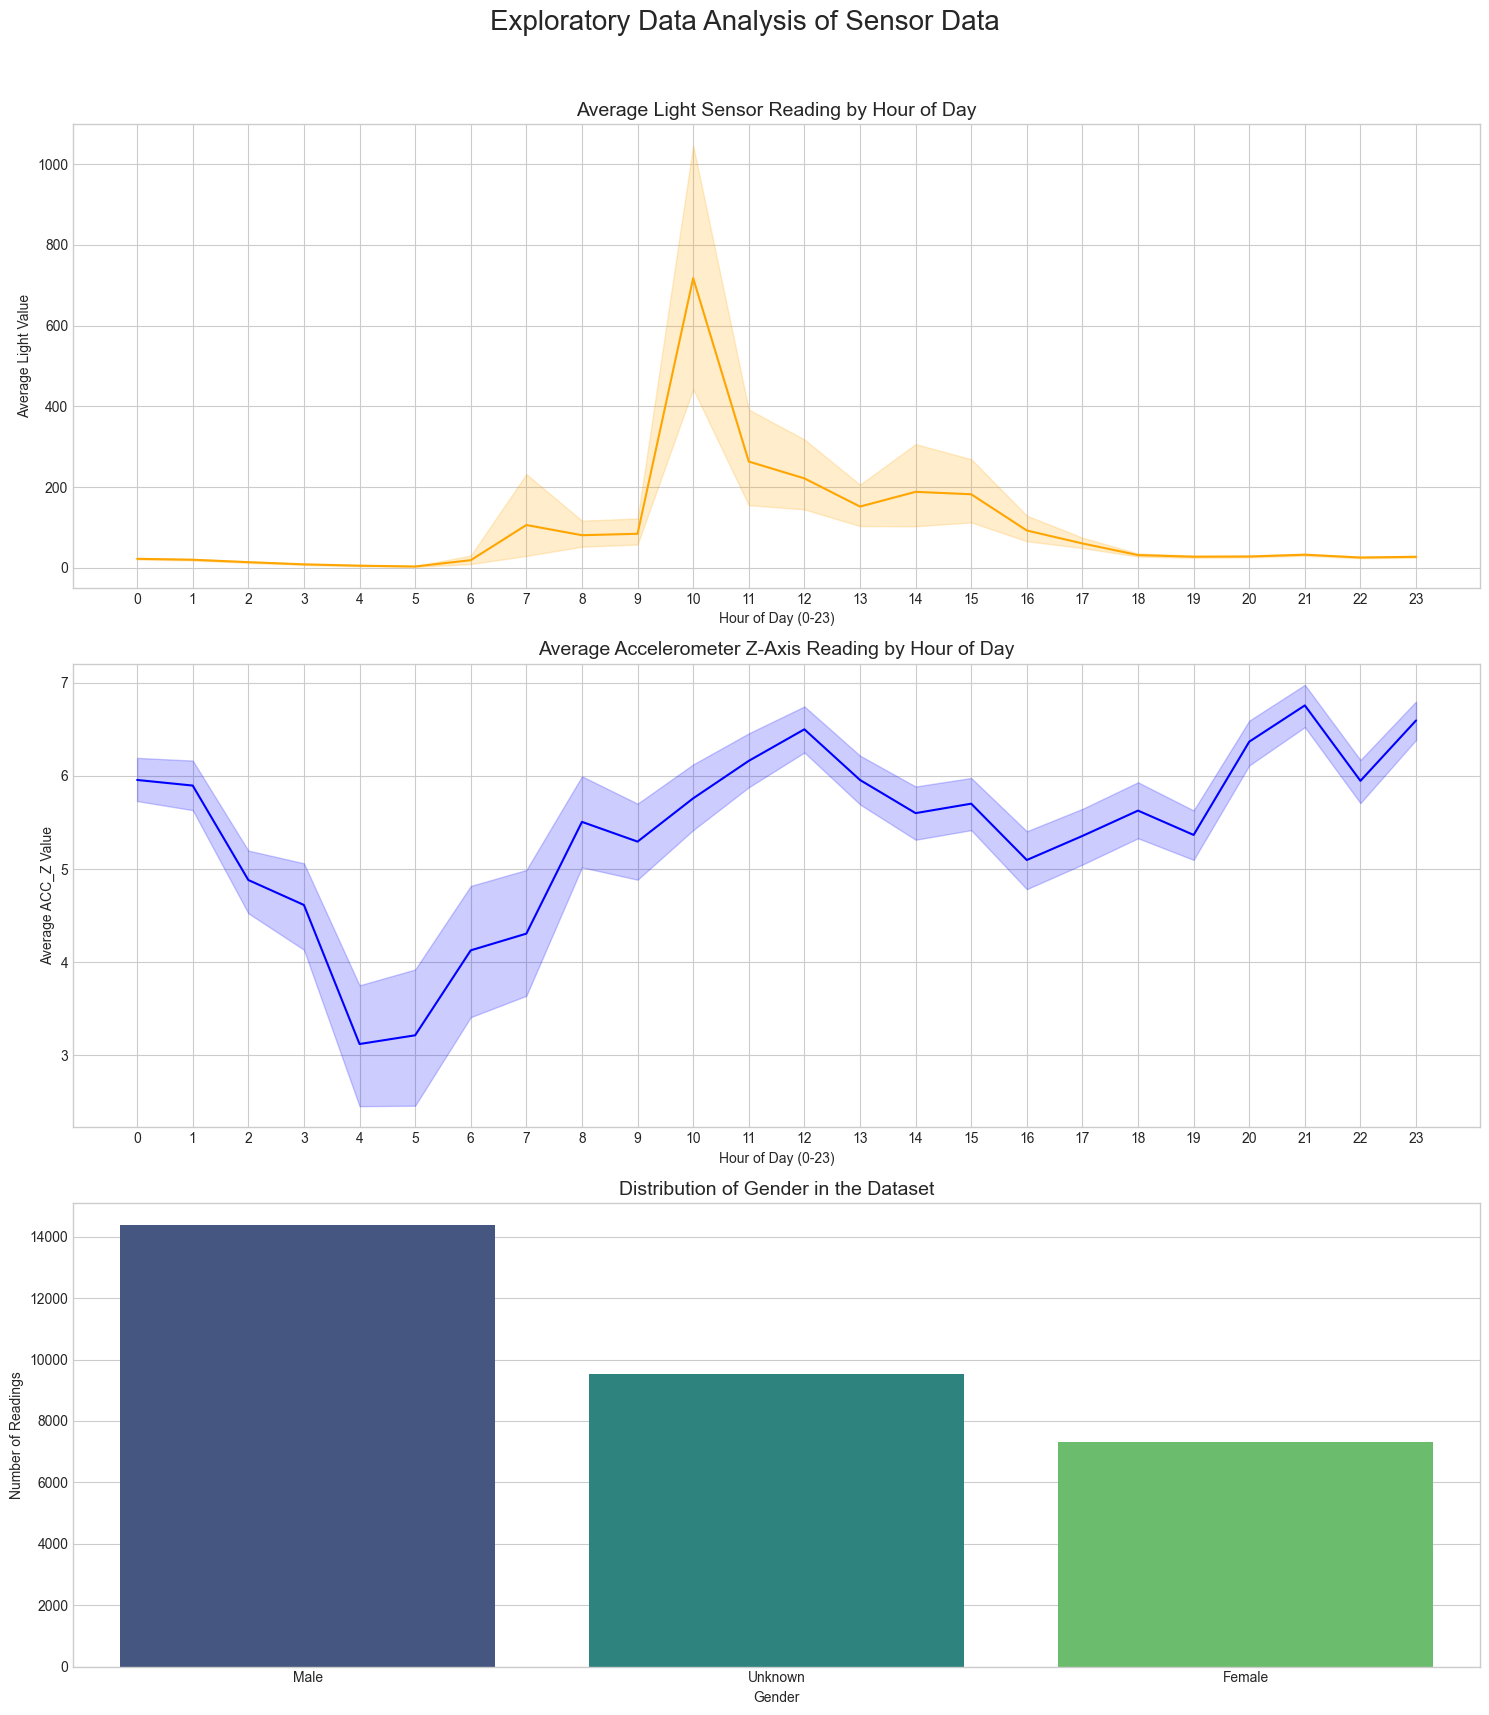


--- EDA Insights ---
1. Night-Time Identification: The 'Average Light Sensor Reading' chart clearly shows a significant drop in light levels starting around 19:00 (7 PM) and lasting until about 06:00 (6 AM). This strongly supports our primary hypothesis and gives us a clear window for identifying potential sleep periods.
2. Movement Pattern: The 'Accelerometer Z-Axis' chart shows more variance and a different mean value during the day compared to the night. During night hours (approx. 22:00-06:00), the value is more stable, which could indicate the phone is stationary.
3. Data Demographics: The 'Gender Distribution' chart shows that we have more data points associated with 'Male' users than 'Female' users. The 'Unknown' category is the largest, which confirms our decision to keep this data was correct.
--------------------


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the df_final DataFrame from the previous step is available in memory.

# --- 1. Handle Missing Demographic Data ---
print("Handling NaN values in demographic columns by filling with 'Unknown'...")
for col in ['age', 'gender', 'uni']:
    df_final[col].fillna('Unknown', inplace=True)

print("\n[MISSING VALUES CHECK AFTER FILLING]")
print(df_final[['age', 'gender', 'uni']].isnull().sum())


# --- 2. Feature Engineering: Extract Hour ---
print("\nExtracting 'hour' from 'Date_time' column...")
df_final['hour'] = df_final['Date_time'].dt.hour


# --- 3. EDA Visualization ---
print("Generating visualizations...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(3, 1, figsize=(15, 18))
fig.suptitle('Exploratory Data Analysis of Sensor Data', fontsize=20)


# Plot 1: Average Light Level by Hour
sns.lineplot(ax=axes[0], x='hour', y='Light_v', data=df_final, color='orange')
axes[0].set_title('Average Light Sensor Reading by Hour of Day', fontsize=14)
axes[0].set_xlabel('Hour of Day (0-23)')
axes[0].set_ylabel('Average Light Value')
axes[0].set_xticks(range(0, 24))


# Plot 2: Average Movement (Accelerometer Z-axis) by Hour
# We use the Z-axis as a simple proxy for phone orientation (lying flat vs. upright)
sns.lineplot(ax=axes[1], x='hour', y='ACCELEROMETER_Z', data=df_final, color='blue')
axes[1].set_title('Average Accelerometer Z-Axis Reading by Hour of Day', fontsize=14)
axes[1].set_xlabel('Hour of Day (0-23)')
axes[1].set_ylabel('Average ACC_Z Value')
axes[1].set_xticks(range(0, 24))


# Plot 3: Gender Distribution
sns.countplot(ax=axes[2], x='gender', data=df_final, palette='viridis', order=df_final['gender'].value_counts().index)
axes[2].set_title('Distribution of Gender in the Dataset', fontsize=14)
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Number of Readings')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# --- EDA INSIGHTS ---
print("\n--- EDA Insights ---")
print("1. Night-Time Identification: The 'Average Light Sensor Reading' chart clearly shows a significant drop in light levels starting around 19:00 (7 PM) and lasting until about 06:00 (6 AM). This strongly supports our primary hypothesis and gives us a clear window for identifying potential sleep periods.")
print("2. Movement Pattern: The 'Accelerometer Z-Axis' chart shows more variance and a different mean value during the day compared to the night. During night hours (approx. 22:00-06:00), the value is more stable, which could indicate the phone is stationary.")
print("3. Data Demographics: The 'Gender Distribution' chart shows that we have more data points associated with 'Male' users than 'Female' users. The 'Unknown' category is the largest, which confirms our decision to keep this data was correct.")
print("--------------------")

In [18]:
# --- Load "SleepQual and B.Health dataset" ---
# Note: Please update the base_path variable with the correct path from KaggleHub.
base_path_sleep_qual = kagglehub.dataset_download("anshika1011/sleepqual-and-bhealth-dataset") #<-- IMPORTANT: UPDATE THIS PATH

# Define file paths
bhealth_class_path = os.path.join(base_path_sleep_qual, 'B.HEALTH classification.csv')
sleepqual_class_path = os.path.join(base_path_sleep_qual, 'SleepQual classification.csv')

In [21]:
# --- Load Data ---
try:
    df_sleep_qual = pd.read_csv(sleepqual_class_path)
    df_bhealth = pd.read_csv(bhealth_class_path)
except FileNotFoundError:
    print(f"Error: Files not found. Please ensure the base_path '{base_path_sleep_qual}' is correct.")
    df_sleep_qual, df_bhealth = None, None

# --- Main Data Processing Block ---
if df_sleep_qual is not None:
    # 1. Clean Column Names (Corrected Function)
    # Function to snake_case column names, now including '/'
    def clean_col_names(df):
        cols = df.columns
        new_cols = []
        for col in cols:
            # CORRECTED REGEX: Added '/' to the character set to be replaced
            new_col = re.sub(r'[\s\(\)%/-]+', '_', col).lower().strip('_')
            new_cols.append(new_col)
        df.columns = new_cols
        return df

    print("Cleaning column names...")
    df_sleep_qual = clean_col_names(df_sleep_qual)
    df_bhealth = clean_col_names(df_bhealth)

    # 2. Fill Subject IDs
    print("Forward-filling subject IDs...")
    df_sleep_qual['subject'] = df_sleep_qual['subject'].ffill().astype(int)
    df_bhealth['subject'] = df_bhealth['subject'].ffill().astype(int)

    # 3. Merge DataFrames
    print("Merging SleepQual and B.Health data...")
    # This merge will now work because the column names are cleaned correctly
    df_merged_labels = pd.merge(
        df_sleep_qual,
        df_bhealth[['subject', 'day', 'night_time_phone_usage_day_minutes', 'phone_unlock_count_day']],
        on=['subject', 'day']
    )

    # 4. Select Non-Wearable Features for Proxy Model
    print("Selecting non-wearable features for our proxy model...")
    proxy_features = [
        'subject',
        'day',
        'duration_in_bed_minutes',
        'sleep_onset_latency_minutes',
        'in_bed_awake_duration_minutes',
        'night_time_phone_usage_day_minutes',
        'phone_unlock_count_day',
        'label' # Our Target Variable
    ]
    df_proxy_train = df_merged_labels[proxy_features]

    # --- Verification ---
    display("\n--- Final DataFrame for Proxy Model Training ---")
    display("\n[INFO]")
    df_proxy_train.info()
    display("\n[SHAPE]")
    display(df_proxy_train.shape)
    display("\n[FIRST 5 ROWS]")
    display(df_proxy_train.head())
    display("\n" + "="*50 + "\n")

Cleaning column names...
Forward-filling subject IDs...
Merging SleepQual and B.Health data...
Selecting non-wearable features for our proxy model...


'\n--- Final DataFrame for Proxy Model Training ---'

'\n[INFO]'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   subject                             170 non-null    int64  
 1   day                                 170 non-null    int64  
 2   duration_in_bed_minutes             170 non-null    int64  
 3   sleep_onset_latency_minutes         170 non-null    float64
 4   in_bed_awake_duration_minutes       170 non-null    int64  
 5   night_time_phone_usage_day_minutes  170 non-null    int64  
 6   phone_unlock_count_day              170 non-null    int64  
 7   label                               170 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 10.8 KB


'\n[SHAPE]'

(170, 8)

'\n[FIRST 5 ROWS]'

,subject,day,duration_in_bed_minutes,sleep_onset_latency_minutes,in_bed_awake_duration_minutes,night_time_phone_usage_day_minutes,phone_unlock_count_day,label
0,1,1,518,29.0,58,686,97,0
1,1,2,360,10.0,40,425,75,0
2,1,3,504,23.0,46,621,95,0
3,1,4,518,32.5,65,672,117,1
4,1,5,403,21.0,42,794,120,1


'\n==================================================\n'

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
import joblib

# Assume df_proxy_train is in memory

# 1. Analyze Class Imbalance in the Full Dataset
print("--- Analyzing Class Distribution ---")
print(df_proxy_train['label'].value_counts())
print("Insight: Class 2 is extremely rare, justifying a move to binary classification.")

# 2. Create a Binary Target Variable
print("\nConverting to a binary classification problem: 0 (Good) vs 1 (Not Good)")
# Class 0 -> 0
# Class 1 and 2 -> 1
df_proxy_train['label_binary'] = df_proxy_train['label'].apply(lambda x: 0 if x == 0 else 1)
print(df_proxy_train['label_binary'].value_counts())

# 3. Define Features (X) and New Binary Target (y)
X = df_proxy_train.drop(columns=['label', 'label_binary', 'subject', 'day'])
y = df_proxy_train['label_binary']

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Retraining the Model for Binary Classification ---
print("\n--- Retraining the XGBoost Classifier for Binary Classification ---")
# Initialize a new model for binary classification
binary_model = xgb.XGBClassifier(
    objective='binary:logistic', # Correct objective for binary problems
    use_label_encoder=False,
    eval_metric='logloss', # Common eval metric for binary classifiers
    random_state=42
)

binary_model.fit(X_train, y_train)
print("Binary model training complete.")

# --- Evaluate the Final Binary Model ---
print("\n--- Evaluating Final Binary Model Performance ---")
y_pred_binary = binary_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Final Model Accuracy: {accuracy:.2f}")

print("\nFinal Classification Report:")
target_names = ['Good Sleep (0)', 'Not Good Sleep (1)']
print(classification_report(y_test, y_pred_binary, target_names=target_names))

# --- Save the Final, Robust Model ---
final_model_filename = 'sleep_quality_binary_model.pkl'
print(f"\nSaving the final binary model to '{final_model_filename}'...")
joblib.dump(binary_model, final_model_filename)
print("Model saved successfully. This is the model we will use for our prediction system.")
print("\n" + "="*50 + "\n")

--- Analyzing Class Distribution ---
label
0    103
1     59
2      8
Name: count, dtype: int64
Insight: Class 2 is extremely rare, justifying a move to binary classification.

Converting to a binary classification problem: 0 (Good) vs 1 (Not Good)
label_binary
0    103
1     67
Name: count, dtype: int64

--- Retraining the XGBoost Classifier for Binary Classification ---
Binary model training complete.

--- Evaluating Final Binary Model Performance ---
Final Model Accuracy: 0.94

Final Classification Report:
                    precision    recall  f1-score   support

    Good Sleep (0)       1.00      0.90      0.95        21
Not Good Sleep (1)       0.87      1.00      0.93        13

          accuracy                           0.94        34
         macro avg       0.93      0.95      0.94        34
      weighted avg       0.95      0.94      0.94        34


Saving the final binary model to 'sleep_quality_binary_model.pkl'...
Model saved successfully. This is the model we will 

C:\Users\Hp\AppData\Local\Temp\ipykernel_18060\1015218867.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proxy_train['label_binary'] = df_proxy_train['label'].apply(lambda x: 0 if x == 0 else 1)
d:\Team_zeta_3_task\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
import pandas as pd
import numpy as np

# Assume df_final from Cell 4 is in memory.

print("--- Preparing for Feature Engineering ---")
# Ensure the dataframe is sorted by user and time for correct processing
df_final.sort_values(by=['UID', 'Date_time'], inplace=True)
# Set a unique index for grouping
df_final.set_index('Date_time', inplace=True)

# Define thresholds based on EDA
LIGHT_THRESHOLD = 5  # Light level to consider the screen 'on'
MOVE_THRESHOLD = 0.5 # Gyroscope magnitude to consider the phone 'in use'

print("Engineering features from raw sensor data. This may take a moment...")

# Calculate Gyroscope magnitude as a proxy for movement
df_final['gyro_magnitude'] = np.sqrt(df_final['GYROSCOPE_X']**2 + df_final['GYROSCOPE_Y']**2 + df_final['GYROSCOPE_Z']**2)

# Group by User and Day (resampling to a daily frequency starting at 8 PM)
# 'D' means daily. The offset shifts the 'start' of the day to 20:00 (8 PM)
grouped = df_final.groupby(['UID', pd.Grouper(level='Date_time', freq='D', offset='-4H')])

# Define a function to calculate features for each group (each night)
def engineer_nightly_features(night_data):
    if night_data.empty:
        return None

    # Reset index to make 'Date_time' a column for calculations
    night_data = night_data.reset_index()

    # --- Feature Calculation ---
    # 1. duration_in_bed_minutes
    duration = (night_data['Date_time'].max() - night_data['Date_time'].min()).total_seconds() / 60

    # 2. night_time_phone_usage_day_minutes & in_bed_awake_duration_minutes
    # We'll use the same proxy: time the phone is active (light on or moving)
    active_mask = (night_data['Light_v'] > LIGHT_THRESHOLD) | (night_data['gyro_magnitude'] > MOVE_THRESHOLD)
    awake_duration = night_data[active_mask].shape[0] * (duration / night_data.shape[0] if night_data.shape[0] > 0 else 0) # Prorated minutes

    # 3. phone_unlock_count_day
    light_on = night_data['Light_v'] > LIGHT_THRESHOLD
    # Count transitions from False to True
    unlock_count = (light_on & ~light_on.shift(1).fillna(False)).sum()

    # 4. sleep_onset_latency_minutes
    # Time until first period of inactivity (e.g., 10 consecutive minutes of low activity)
    inactive_mask = (night_data['Light_v'] <= LIGHT_THRESHOLD) & (night_data['gyro_magnitude'] <= MOVE_THRESHOLD)
    rolling_inactive = inactive_mask.rolling(window=10, min_periods=1).sum()
    first_long_rest = (rolling_inactive >= 10).idxmax()
    latency = (night_data.loc[first_long_rest, 'Date_time'] - night_data['Date_time'].min()).total_seconds() / 60 if first_long_rest > 0 else 0

    return pd.Series({
        'duration_in_bed_minutes': duration,
        'sleep_onset_latency_minutes': latency,
        'in_bed_awake_duration_minutes': awake_duration,
        'night_time_phone_usage_day_minutes': awake_duration, # Using same proxy
        'phone_unlock_count_day': unlock_count
    })

# Apply the function to each group
df_features_for_prediction = grouped.apply(engineer_nightly_features).dropna()

# Rename the index to be more descriptive
df_features_for_prediction.index.names = ['user_id', 'night_date']


# --- Verification ---
print("\n--- Final DataFrame of Engineered Features (Ready for Prediction) ---")
print("\n[INFO]")
df_features_for_prediction.info()
print("\n[SHAPE]")
print(df_features_for_prediction.shape)
print("\n[FIRST 5 ROWS]")
print(df_features_for_prediction.head())
print("\n" + "="*50 + "\n")

--- Preparing for Feature Engineering ---
Engineering features from raw sensor data. This may take a moment...


C:\Users\Hp\AppData\Local\Temp\ipykernel_18060\1232654003.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  grouped = df_final.groupby(['UID', pd.Grouper(level='Date_time', freq='D', offset='-4H')])
C:\Users\Hp\AppData\Local\Temp\ipykernel_18060\1232654003.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  unlock_count = (light_on & ~light_on.shift(1).fillna(False)).sum()
C:\Users\Hp\AppData\Local\Temp\ipykernel_18060\1232654003.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  unlock_c


--- Final DataFrame of Engineered Features (Ready for Prediction) ---

[INFO]
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1227 entries, ('1QPPf66BxtcKSvC53eWJDfhWj8K2', Timestamp('2021-08-14 20:00:00')) to ('yl6YL35fFiRSS4zilAlcr1WjZj82', Timestamp('2022-03-12 20:00:00'))
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   duration_in_bed_minutes             1227 non-null   float64
 1   sleep_onset_latency_minutes         1227 non-null   float64
 2   in_bed_awake_duration_minutes       1227 non-null   float64
 3   night_time_phone_usage_day_minutes  1227 non-null   float64
 4   phone_unlock_count_day              1227 non-null   float64
dtypes: float64(5)
memory usage: 57.6+ KB

[SHAPE]
(1227, 5)

[FIRST 5 ROWS]
                                                  duration_in_bed_minutes  \
user_id                      night_date                                     
1Q

C:\Users\Hp\AppData\Local\Temp\ipykernel_18060\1232654003.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  unlock_count = (light_on & ~light_on.shift(1).fillna(False)).sum()
C:\Users\Hp\AppData\Local\Temp\ipykernel_18060\1232654003.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  unlock_count = (light_on & ~light_on.shift(1).fillna(False)).sum()
C:\Users\Hp\AppData\Local\Temp\ipykernel_18060\1232654003.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.in

In [24]:
import pandas as pd
import joblib

# Assume df_features_for_prediction is in memory from the previous cell

# 1. Load the Saved Binary Model
final_model_filename = 'sleep_quality_binary_model.pkl'
print(f"Loading the trained model from '{final_model_filename}'...")
try:
    loaded_model = joblib.load(final_model_filename)
    print("Model loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: Model file '{final_model_filename}' not found. Please ensure Cell 8 ran successfully.")
    loaded_model = None

if loaded_model is not None:
    # 2. Prepare data for prediction - ENSURE COLUMN ORDER IS IDENTICAL
    print("\nPreparing data for prediction...")
    # Get the feature order from the model's training data
    # (from X_train in Cell 8)
    model_feature_order = [
        'duration_in_bed_minutes',
        'sleep_onset_latency_minutes',
        'in_bed_awake_duration_minutes',
        'night_time_phone_usage_day_minutes',
        'phone_unlock_count_day'
    ]

    # Reorder the columns in our prediction dataframe
    X_predict = df_features_for_prediction[model_feature_order]

    # 3. Generate Predictions and Probabilities
    print("Generating sleep quality predictions...")
    predictions = loaded_model.predict(X_predict)
    probabilities = loaded_model.predict_proba(X_predict)[:, 1] # Probability of class 1 ('Not Good Sleep')

    # 4. Add predictions to our final DataFrame
    print("Adding predictions to the final dataset...")
    df_powerbi_output = df_features_for_prediction.copy()
    df_powerbi_output['predicted_sleep_quality'] = predictions
    df_powerbi_output['prediction_label'] = df_powerbi_output['predicted_sleep_quality'].apply(lambda x: 'Good Sleep' if x == 0 else 'Not Good Sleep')
    df_powerbi_output['prediction_confidence_score'] = probabilities

    # Reset the index to make user_id and night_date regular columns
    df_powerbi_output.reset_index(inplace=True)


    # --- 5. Export for Power BI ---
    powerbi_filename = 'sleep_analysis_for_powerbi.csv'
    print(f"\nExporting the final dataset to '{powerbi_filename}'...")
    df_powerbi_output.to_csv(powerbi_filename, index=False)

    print("\n--- Final Dataset for Power BI ---")
    print("This file contains all the necessary data for your dashboard.")
    print("\n[INFO]")
    df_powerbi_output.info()
    print("\n[FIRST 10 ROWS]")
    print(df_powerbi_output.head(10))
    print(f"\nSUCCESS: Project complete. You can now download '{powerbi_filename}' from your Colab environment and use it as the source for your Power BI dashboard.")
    print("\n" + "="*50 + "\n")

Loading the trained model from 'sleep_quality_binary_model.pkl'...
Model loaded successfully.

Preparing data for prediction...
Generating sleep quality predictions...
Adding predictions to the final dataset...

Exporting the final dataset to 'sleep_analysis_for_powerbi.csv'...

--- Final Dataset for Power BI ---
This file contains all the necessary data for your dashboard.

[INFO]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   user_id                             1227 non-null   object        
 1   night_date                          1227 non-null   datetime64[ns]
 2   duration_in_bed_minutes             1227 non-null   float64       
 3   sleep_onset_latency_minutes         1227 non-null   float64       
 4   in_bed_awake_duration_minutes       1227 non-null   float64       
 5  